In [324]:
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [325]:
df=pd.read_csv("D:\pyt\Assignment\Assignment 13-KNN\glass.csv")

In [326]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [327]:
x= df.drop("Type", axis=1)
y= df["Type"]

In [328]:
x.corr()          # It can be seen from table that RI and Ca are highly corelated so droping Ca

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


<AxesSubplot:>

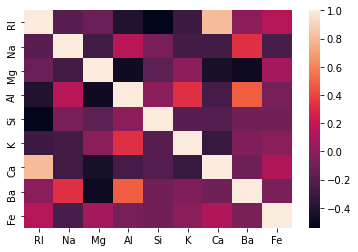

In [329]:
sns.heatmap(x.corr())

In [330]:
x= x.drop("Ca", axis=1)
x

,RI,Na,Mg,Al,Si,K,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,0.00,0.0
...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,1.57,0.0


In [331]:
x.isna().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ba    0
Fe    0
dtype: int64

In [332]:
x.isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ba    0
Fe    0
dtype: int64

In [333]:
y.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

# Applying KNN without hyper parameter tuning(without Gridsearch cv)

In [334]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [335]:
# Applying Standard Scalar to data
scaled = StandardScaler()
std_df = scaled.fit_transform(x)

In [336]:
x_train, x_test, y_train, y_test = train_test_split(std_df, y, test_size=0.2, random_state=42)

In [337]:
y_test.shape

(43,)

In [338]:
knn= KNeighborsClassifier(n_neighbors=4)

In [339]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [340]:
y_pred = knn.predict(x_test)

In [341]:
accuracy_score(y_test, y_pred)

0.7441860465116279

In [342]:
confusion_matrix(y_test, y_pred)

array([[10,  1,  0,  0,  0,  0],
       [ 3, 11,  0,  0,  0,  0],
       [ 1,  2,  0,  0,  0,  0],
       [ 0,  2,  0,  2,  0,  0],
       [ 0,  0,  0,  1,  2,  0],
       [ 0,  0,  0,  0,  1,  7]], dtype=int64)

In [343]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.71      0.91      0.80        11
           2       0.69      0.79      0.73        14
           3       0.00      0.00      0.00         3
           5       0.67      0.50      0.57         4
           6       0.67      0.67      0.67         3
           7       1.00      0.88      0.93         8

    accuracy                           0.74        43
   macro avg       0.62      0.62      0.62        43
weighted avg       0.70      0.74      0.72        43



# Applying KNN with hyper parameter tuning(using Gridsearch cv)

In [344]:
from sklearn.model_selection import GridSearchCV

In [345]:
neibhors= np.array(range(1,15))
parameters= [{"n_neighbors":neibhors ,"algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
              "weights":['uniform', 'distance']}]


grid_search= GridSearchCV(estimator=knn, param_grid=parameters, scoring="accuracy",cv=3, n_jobs=-1 )

grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=4), n_jobs=-1,
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [346]:
grid_search.best_score_

0.6842105263157894

In [347]:
grid_search.best_params_ 

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}

In [348]:
# Applying above best parameters in model to get best accuracy
knn1= KNeighborsClassifier(algorithm='auto', n_neighbors= 5, weights='distance')

In [349]:
knn1.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [350]:
y_pred1 = knn1.predict(x_test)

In [351]:
accuracy = np.round(accuracy_score(y_test, y_pred1)*100, 2)
print(accuracy)

74.42


In [352]:
confusion_matrix(y_test, y_pred1)

array([[10,  1,  0,  0,  0,  0],
       [ 4, 10,  0,  0,  0,  0],
       [ 1,  2,  0,  0,  0,  0],
       [ 0,  2,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  1,  7]], dtype=int64)

In [353]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           1       0.67      0.91      0.77        11
           2       0.67      0.71      0.69        14
           3       0.00      0.00      0.00         3
           5       1.00      0.50      0.67         4
           6       0.75      1.00      0.86         3
           7       1.00      0.88      0.93         8

    accuracy                           0.74        43
   macro avg       0.68      0.67      0.65        43
weighted avg       0.72      0.74      0.72        43

